In [1]:
import fasttext
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import fasttext.util

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train = pd.read_csv('train.tsv',sep='\t')

In [4]:
def format_text(df,col):
  #Remove @ tags
  comp_df = df.copy()
    
  # remove all the punctuation
  comp_df[col] = comp_df[col].str.replace(r'(@\w*)','')

  #Remove URL
  comp_df[col] = comp_df[col].str.replace(r"http\S+", "")

  #Remove # tag and the following words
  comp_df[col] = comp_df[col].str.replace(r'#\w+',"")

  #Remove all non-character
  comp_df[col] = comp_df[col].str.replace(r"[^a-zA-Z ]","")

  # Remove extra space
  comp_df[col] = comp_df[col].str.replace(r'( +)'," ")
  comp_df[col] = comp_df[col].str.strip()

  # Change to lowercase
  comp_df[col] = comp_df[col].str.lower()
  comp_df[col] = comp_df[col].str.replace('httpurl', '')
  return comp_df

In [5]:
train = format_text(train,'Text')

In [6]:
X_X = train['Text']
Y_train = train['Label']

In [7]:
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)

In [8]:
X_X = X_X.tolist()
Y_train=Y_train

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X_X).toarray()

In [ ]:
X.shape

In [10]:
import scipy.signal
def energy(u):
# Estimate PSD `S_xx_welch` at discrete frequencies `f_welch`
    f_welch, S_xx_welch = scipy.signal.welch(u)

    # Integrate PSD over spectral bandwidth
    # to obtain signal power `P_welch`
    df_welch = f_welch[1] - f_welch[0]
    return np.sum(S_xx_welch) * df_welch

In [11]:
from vmdpy import VMD

In [12]:
def maxvdm(f):
    alpha = 2     
    tau = 0.            
    K = 2       
    DC = 0             
    init = 1           
    tol = 1e-7  
    u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol) 
    energy_array=[]
    for i in u:
        energy_array.append(energy(i))
    ind = np.argmax(energy_array)
    return u[ind]

In [13]:
X_data = []
for i in features:
    X_data.append(maxvdm(i))

In [26]:
df = pd.DataFrame(X_data)

In [27]:
df['l'] = Y_train

df.to_csv("VMDed_Data_TFIDF.csv")

df1 = pd.DataFrame(features)
df1['y'] = Y_train
df1.to_csv("nonVMD_Data_TFIDF.csv")

In [14]:
test = pd.read_csv('test.tsv',sep='\t',header=None)
test = format_text(test,1)
X_X_1 = test[1].tolist()

In [15]:
test.head()

,0,1,2
0,1235770448966754309,pa hospitals dont have the capacity latest fro...,UNINFORMATIVE
1,1235748200742416384,coronavirus outbreak intel employee in bengalu...,INFORMATIVE
2,1236129620363100161,trump is trying to bs his way through the coro...,UNINFORMATIVE
3,1241191765195001857,how dramatically could we slow down this from ...,UNINFORMATIVE
4,1245182515213676546,an instagram post from comedienne amy schumer ...,UNINFORMATIVE


In [16]:
features_test = tfidf.transform(X_X_1).toarray()

In [18]:
df = pd.DataFrame(X_data_1)

In [19]:
Y_test = le.transform(test[2])
#df['label']=Y_test

df.to_csv("Test_VMD_TFIDF.csv")

In [83]:
np.array(X_data).shape

(6936, 5642)

In [84]:
np.array(X_data_1).shape

(2000, 5642)

In [37]:
mdl1 = LogisticRegression(random_state=0)

In [38]:
import time

In [39]:
%%time
mdl1.fit(features,Y_train)

CPU times: user 3.18 s, sys: 193 ms, total: 3.38 s
Wall time: 1.03 s


LogisticRegression(random_state=0)

In [42]:
start = time.time()
mdl1.fit(features,Y_train)
end = time.time()
print(end - start)
y_pred = mdl1.predict(X_data_1)

0.857712984085083


In [23]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       944
           1       0.68      0.84      0.75      1056

    accuracy                           0.70      2000
   macro avg       0.72      0.70      0.69      2000
weighted avg       0.71      0.70      0.70      2000



In [24]:
print("Acc:",accuracy_score(Y_test, y_pred))
print("F1:",f1_score(Y_test, y_pred))
print("Pre:",precision_score(Y_test, y_pred))
print("Re:",recall_score(Y_test, y_pred))

Acc: 0.7045
F1: 0.749682337992376
Pre: 0.6781609195402298
Re: 0.8380681818181818


In [33]:
mdl2 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [40]:
%%time
mdl2.fit(features,Y_train)

CPU times: user 3.26 s, sys: 89.3 ms, total: 3.35 s
Wall time: 3.42 s


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [26]:
start = time.time()
mdl2.fit(X_data,Y_train)
end = time.time()
print(end - start)
y_pred = mdl2.predict(X_data_1)

15.4497971534729


In [27]:
print("Acc:",accuracy_score(Y_test, y_pred))
print("F1:",f1_score(Y_test, y_pred))
print("Pre:",precision_score(Y_test, y_pred))
print("Re:",recall_score(Y_test, y_pred))

Acc: 0.623
F1: 0.7211538461538461
Pre: 0.591626213592233
Re: 0.9232954545454546


In [35]:
mdl3 = KNeighborsClassifier(n_neighbors=3)

In [41]:
%%time
mdl3.fit(features,Y_train)

CPU times: user 2.43 s, sys: 51.3 ms, total: 2.48 s
Wall time: 2.48 s


KNeighborsClassifier(n_neighbors=3)

In [29]:
start = time.time()
mdl3.fit(X_data,Y_train)
end = time.time()
print(end - start)
y_pred = mdl3.predict(X_data_1)
print("Acc:",accuracy_score(Y_test, y_pred))
print("F1:",f1_score(Y_test, y_pred))
print("Pre:",precision_score(Y_test, y_pred))
print("Re:",recall_score(Y_test, y_pred))

2.4031012058258057
Acc: 0.67
F1: 0.67098703888335
Pre: 0.708421052631579
Re: 0.6373106060606061


In [13]:
words = tfidf.get_feature_names()

In [14]:
words

['ab',
 'abba',
 'abba kyari',
 'abbott',
 'abc',
 'abc news',
 'ability',
 'able',
 'aboard',
 'aboard cruise',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'abuja',
 'abundance',
 'academic',
 'accepting',
 'access',
 'accident',
 'accidents',
 'according',
 'according data',
 'according health',
 'according latest',
 'according new',
 'according state',
 'account',
 'accountable',
 'accounting',
 'accounts',
 'accurate',
 'accused',
 'act',
 'acted',
 'acting',
 'acting like',
 'action',
 'actions',
 'active',
 'active cases',
 'actively',
 'activities',
 'activity',
 'acton',
 'actor',
 'actual',
 'actually',
 'acute',
 'acute respiratory',
 'ad',
 'adam',
 'adapt',
 'add',
 'added',
 'added new',
 'adding',
 'addition',
 'additional',
 'additional cases',
 'additional positive',
 'address',
 'addressed',
 'addresses',
 'adds',
 'adequate',
 'admin',
 'administration',
 'administrations',
 'administrator',
 'admission',
 'admissions',
 'admits',
 'admitted',
 'admitted hospital'

In [17]:
len(words)

4822

In [18]:
features.shape

(6936, 4822)

In [22]:
from sklearn.manifold import TSNE
TFIDF_embedded = TSNE(n_components=2).fit_transform(features.T)

In [23]:
TFIDF_embedded.shape

(4822, 2)

In [25]:
import matplotlib.pyplot as plt

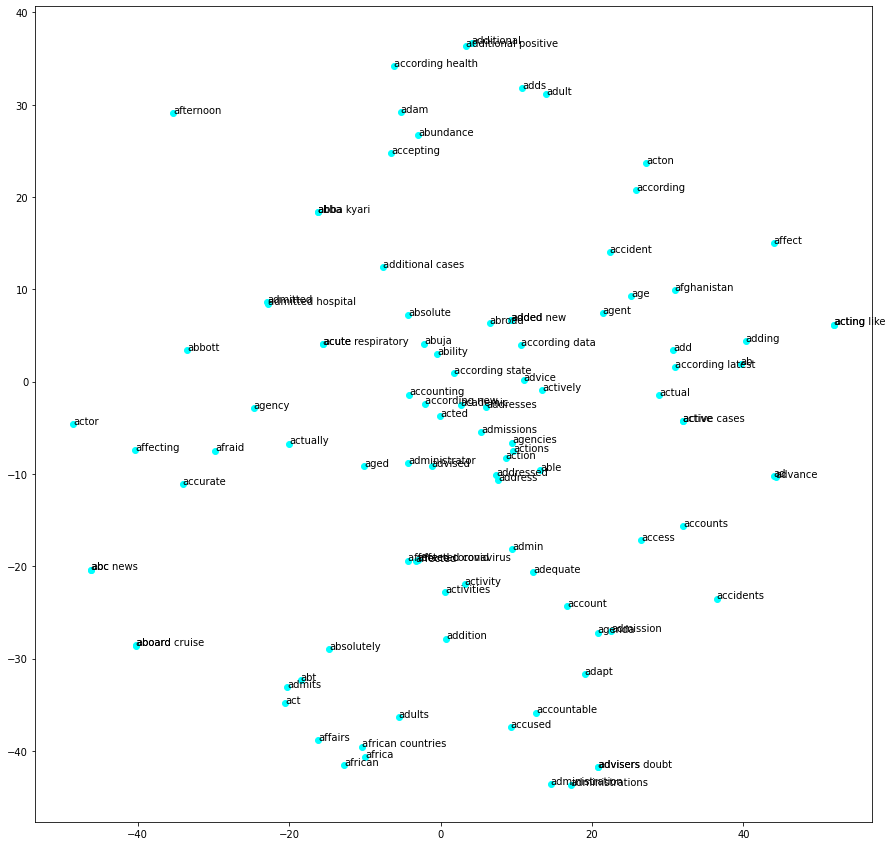

In [31]:
plt.figure(figsize=(15,15))
for i in range(0, 100):
    plt.scatter(TFIDF_embedded[i][0], TFIDF_embedded[i][1], c='cyan')
    plt.annotate(words[i], TFIDF_embedded[i], xytext=None, xycoords='data', textcoords='data', arrowprops=None)

plt.show()